# VISUALIZATION FOR TESTING

C:\Users\Elena\AppData\Local\Temp\ipykernel_28676\2829440054.py:40: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  building_clip.plot(ax=ax1, color='gray', alpha=0.6)
C:\Users\Elena\AppData\Local\Temp\ipykernel_28676\2829440054.py:54: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  building_clip.plot(ax=ax2, color='lightgray', alpha=0.3)
C:\Users\Elena\AppData\Local\Temp\ipykernel_28676\2829440054.py:65: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  building_clip.plot(ax=ax3, color='lightgray', alpha=0.3)
C:\Users\Elena\AppData\Local\Temp\ipykernel_28676\2829440054.py:76: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  building_clip.plot(ax=ax4, color='lightgray', alpha=0.3)


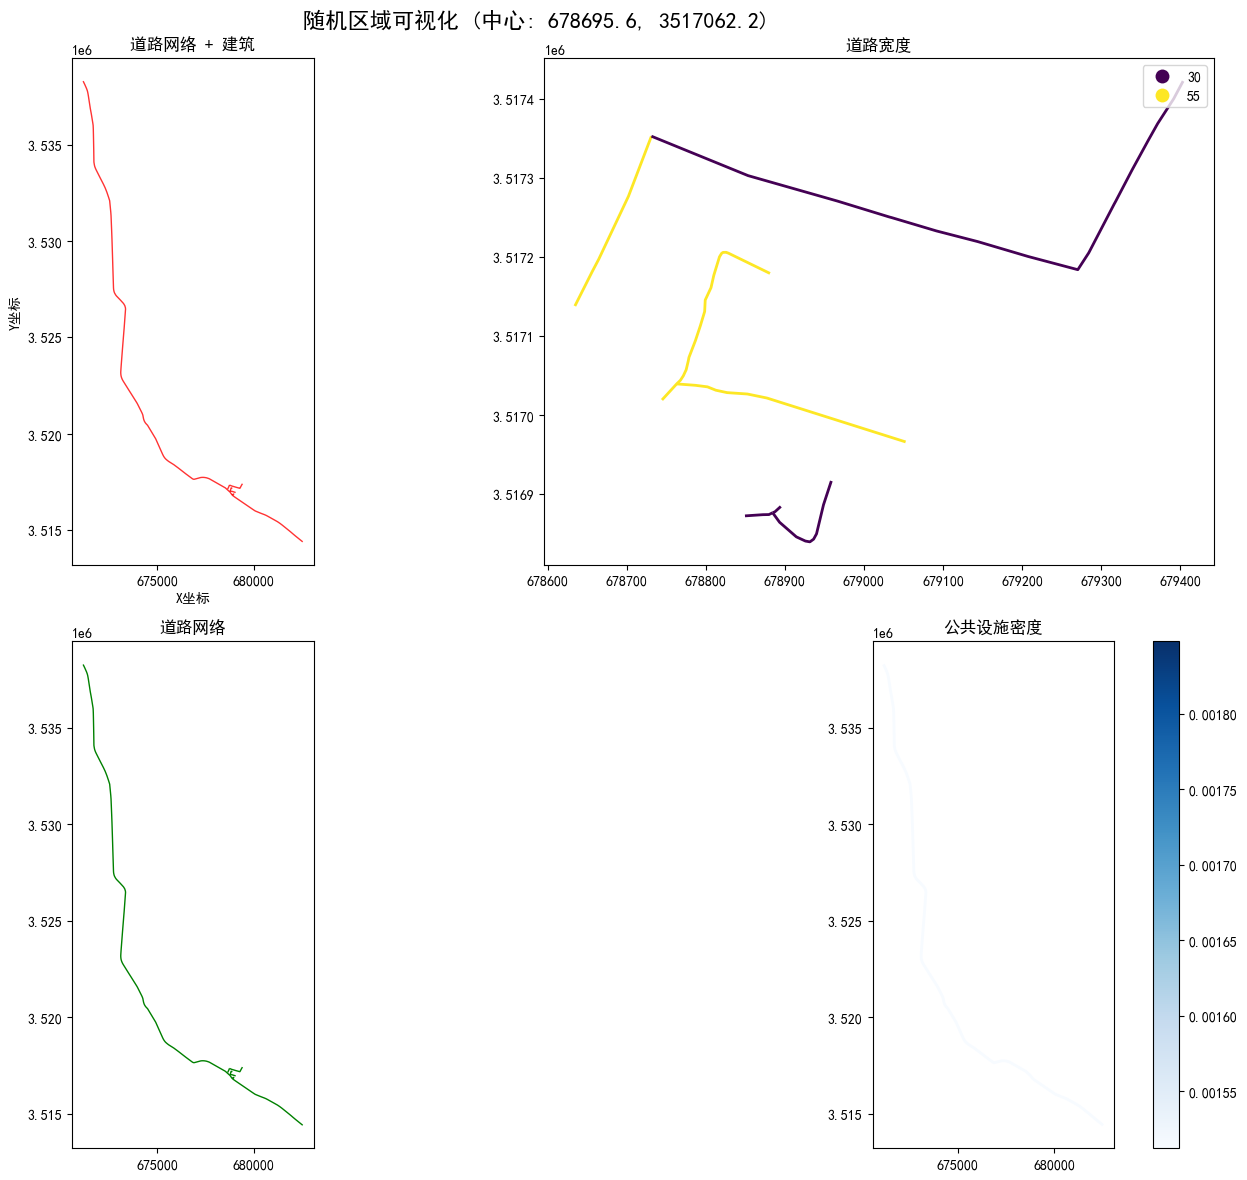

截取区域统计:
道路段数量: 8
建筑数量: 0


TypeError: '<=' not supported between instances of 'float' and 'str'

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import random

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def visualize_random_area(street_data, building_data, size=500):
    """
    随机截取指定大小的区域并可视化
    """
    # 获取整个数据集的边界
    bounds = street_data.total_bounds
    
    # 随机选择一个中心点
    center_x = random.uniform(bounds[0], bounds[2])
    center_y = random.uniform(bounds[1], bounds[3])
    
    # 创建500x500米的边界框
    half_size = size / 2
    bbox = box(center_x - half_size, center_y - half_size, 
               center_x + half_size, center_y + half_size)
    
    # 截取道路数据
    street_clip = street_data[street_data.geometry.intersects(bbox)]
    
    # 截取建筑数据
    building_clip = building_data[building_data.geometry.intersects(bbox)]
    
    # 创建子图
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'随机区域可视化 (中心: {center_x:.1f}, {center_y:.1f})', fontsize=16)
    
    # 1. 道路网络
    ax1 = axes[0, 0]
    street_clip.plot(ax=ax1, color='red', linewidth=1, alpha=0.8)
    building_clip.plot(ax=ax1, color='gray', alpha=0.6)
    ax1.set_title('道路网络 + 建筑')
    ax1.set_xlabel('X坐标')
    ax1.set_ylabel('Y坐标')
    
    # 2. 道路宽度可视化
    ax2 = axes[0, 1]
    if 'width' in street_clip.columns:
        street_clip.plot(column='width', ax=ax2, cmap='viridis', 
                        legend=True, linewidth=2)
        ax2.set_title('道路宽度')
    else:
        street_clip.plot(ax=ax2, color='blue', linewidth=1)
        ax2.set_title('道路网络')
    building_clip.plot(ax=ax2, color='lightgray', alpha=0.3)
    
    # 3. POI密度可视化
    ax3 = axes[1, 0]
    if 'count' in street_clip.columns:
        street_clip.plot(column='count', ax=ax3, cmap='Reds', 
                        legend=True, linewidth=2)
        ax3.set_title('POI密度')
    else:
        street_clip.plot(ax=ax3, color='green', linewidth=1)
        ax3.set_title('道路网络')
    building_clip.plot(ax=ax3, color='lightgray', alpha=0.3)
    
    # 4. 综合特征可视化
    ax4 = axes[1, 1]
    if 'public_den' in street_clip.columns:
        street_clip.plot(column='public_den', ax=ax4, cmap='Blues', 
                        legend=True, linewidth=2)
        ax4.set_title('公共设施密度')
    else:
        street_clip.plot(ax=ax4, color='purple', linewidth=1)
        ax4.set_title('道路网络')
    building_clip.plot(ax=ax4, color='lightgray', alpha=0.3)
    
    # 调整布局
    plt.tight_layout()
    plt.show()
    
    # 打印统计信息
    print(f"截取区域统计:")
    print(f"道路段数量: {len(street_clip)}")
    print(f"建筑数量: {len(building_clip)}")
    if 'count' in street_clip.columns:
        print(f"POI密度范围: {street_clip['count'].min():.2f} - {street_clip['count'].max():.2f}")
    if 'width' in street_clip.columns:
        print(f"道路宽度范围: {street_clip['width'].min():.2f} - {street_clip['width'].max():.2f}")

# 使用示例
# 假设你已经加载了数据
street_data = gpd.read_file('data_for_test/Street.geojson')
building_data = gpd.read_file('data_for_test/meters_data/building_meters.shp')

# 调用函数
visualize_random_area(street_data, building_data, size=500)

In [11]:
import pickle

def quick_check_fields(pkl_path="models/data/route_graphs.pkl"):
    """快速查看route_graphs.pkl中的字段"""
    
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    print(f"总图数量: {len(route_graphs)}")
    
    # 查看第一个图的字段
    if route_graphs:
        G = route_graphs[0]['graph']
        
        print("\n=== 节点字段 ===")
        for node, attrs in list(G.nodes(data=True))[:1]:  # 只看第一个节点
            for key, value in attrs.items():
                print(f"{key}: {type(value).__name__} = {value}")
        
        print("\n=== 边字段 ===")
        for u, v, attrs in list(G.edges(data=True))[:1]:  # 只看第一条边
            for key, value in attrs.items():
                print(f"{key}: {type(value).__name__} = {value}")

# 运行
quick_check_fields()

总图数量: 2161

=== 节点字段 ===
geometry: LineString = LINESTRING (665494.6339183038 3546536.148439774, 665487.0881562907 3546534.9081066335, 665473.8831931632 3546532.468063791, 665438.1108589859 3546524.092580784, 665370.2684328177 3546510.735573304, 665349.5526606621 3546505.9437442035, 665112.4806500266 3546435.345380437)
length: float = 395.5834395482565
width: str = 30
highway: str = street
height_mean: float = 29.609756097560975
frontage_L_mean: float = 73.0
public_den: float = 0.01076
transport_den: float = 0.00807
nvdi_mean: float = 0.1567105758521292
hop_level: int = 0
is_center: bool = True

=== 边字段 ===
intersection_coords: tuple = (665494.6339183038, 3546536.148439774)
